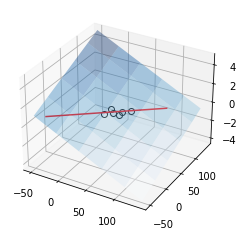

입력한 동물은 학습 모델에 의해 수컷으로 판단 됩니다


In [40]:
%matplotlib inline
import sympy as sym
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

f = open("Linear_classification.txt", 'r')
line = f.read()
line = line.split('\n')
li = list()
li_x = list()
li_y = list()
li_z = list()
for l in line :
    li.append(list(map(int, l.split(' '))))
x, y, z, a, b, c = sym.symbols("x,y,z,a,b,c")
R = 0
for l in li:
    a,b,c = l
    li_x.append(a)
    li_y.append(b)
    li_z.append(c)
    R += (a*x+b*y+z-c)**2 

_Rx = sym.diff(R,x)
_Ry = sym.diff(R,y)
_Rz = sym.diff(R,z)
a1 = _Rx.coeff(x)
b1 = _Rx.coeff(y)
c1 = _Rx.coeff(z)
d1 = _Rx.subs(x,0)
d1 = d1.subs(y,0)
d1 = d1.subs(z,0)
d1 = -d1

a2 = _Ry.coeff(x)
b2 = _Ry.coeff(y)
c2 = _Ry.coeff(z)
d2 = _Ry.subs(x,0)
d2 = d2.subs(y,0)
d2 = d2.subs(z,0)
d2 = -d2

a3 = _Rz.coeff(x)
b3 = _Rz.coeff(y)
c3 = _Rz.coeff(z)
d3 = _Rz.subs(x,0)
d3 = d3.subs(y,0)
d3 = d3.subs(z,0)
d3 = -d3


A = [[int(a1),int(b1),int(c1)],[int(a2),int(b2),int(c2)],[int(a3),int(b3),int(c3)]]
b = [int(d1),int(d2),int(d3)]
inv_A = np.linalg.inv(A)
result = np.dot(inv_A,b)

_x,_y,_z = result
a,b,c = sym.symbols("a,b,c")
f = _x*a + _y*b + _z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = li_x
y = li_y
z = li_z
X = np.arange(-0.5, 1.5, 0.1)*100
Y = np.arange(-0.5, 1.5, 0.1)*100
X, Y = np.meshgrid(X, Y)
Z = (float(_x) * Y) + (float(_y) * X) + float(_z)
ax.plot(x, y, z, linestyle="none", marker="o", mfc="none", markeredgecolor="k") #샘플 출력
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.4, cmap=cm.Blues) # 평면 출력
ax.plot([-50, 100], [-16.7037, 99.9629], [0,0],'r-') # 선 출력
plt.show()

answer = f.subs(a,50)
answer = answer.subs(b,30)

sex = ""
if answer >= 0 :
    sex = "수컷"
else:
    sex = "암컷"

swer = f.subs(a,50)
answer = answer.subs(b,30)

sex = ""
if answer >= 0 :
    sex = "수컷"
else:
    sex = "암컷"

print("입력한 동물은 학습 모델에 의해 %s으로 판단 됩니다" %(sex))

(10*x + 60*y + z + 1)**2 + (20*x + 70*y + z + 1)**2 + (30*x + 80*y + z + 1)**2 + (40*x + 30*y + z - 1)**2 + (60*x + 20*y + z - 1)**2 + (70*x + 40*y + z - 1)**2